In [10]:
from scipy.stats import ttest_ind, normaltest, shapiro

split_n = 0
splits = {}
with open("training_out_10_splits.log", "r") as f:
    lines = f.readlines()
    for line in lines:
        split_line = line.split()
        if split_line[0] == "Split":
            split_n = int(split_line[1])
            splits[split_n] = {}
        elif split_line[0] == "BERT":
            splits[split_n]["BERT"] = (float(split_line[9][:-1]))
        elif split_line[0] == "CNN":
            splits[split_n]["CNN"] = (float(split_line[9][:-1]))
        elif split_line[0] == "GBC":
            splits[split_n]["GBC"] = (float(split_line[9][:-1]))

In [ ]:
import pandas as pd
dt = pd.DataFrame(splits)

In [14]:
from scipy.stats import friedmanchisquare, wilcoxon
from scikit_posthocs import posthoc_nemenyi_friedman
import numpy as np
import pandas as pd
import itertools

np.random.seed(0)
df = pd.DataFrame(dt.to_numpy().T.reshape(11,3),columns=['CNN','DNABERT','GBC'])

f_test = friedmanchisquare(df['CNN'],df['DNABERT'],df['GBC'])
f_res = pd.DataFrame({'test':'Friedman','statistic':f_test[0],'pvalue':f_test[1]},index=[0])



wilc_test = [wilcoxon(df[i],df[j]) for i,j in itertools.combinations(df.columns,2)]    
w_res = pd.DataFrame(wilc_test)
w_res['test'] = ["wilcoxon " + i+" vs "+j for i,j in itertools.combinations(df.columns,2)]  

pd.concat([f_res,w_res])

,test,statistic,pvalue
0,Friedman,16.909091,0.000213
0,wilcoxon CNN vs DNABERT,32.000000,0.965820
1,wilcoxon CNN vs GBC,0.000000,0.000977
2,wilcoxon DNABERT vs GBC,0.000000,0.000977


In [23]:
posthoc_nemenyi_friedman(dt.to_numpy().T)

,0,1,2
0,1.000000,0.777626,0.001000
1,0.777626,1.000000,0.003955
2,0.001000,0.003955,1.000000


In [ ]:
posthoc_nemenyi_friedman

<Axes: >

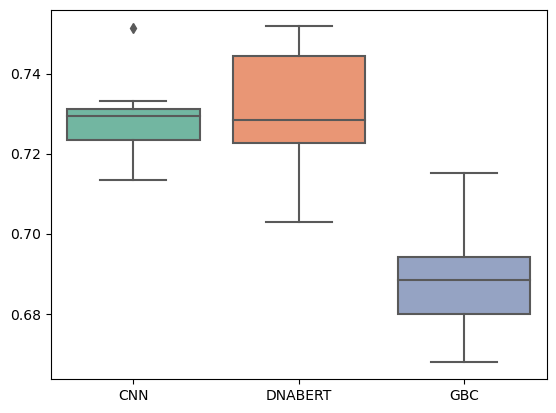

In [13]:
import seaborn as sns

sns.boxplot(data=df, orient='v', palette='Set2')

In [ ]:
_, p_bert_short = shapiro(dt.loc["BERT_short"])
_, p_bert_long = shapiro(dt.loc["BERT_long"])
_, p_cnn = shapiro(dt.loc["CNN"])
_, p_gbc = shapiro(dt.loc["GBC"])
print(p_bert_short, p_bert_long, p_cnn, p_gbc)

### In case normality assumption is met

In [46]:
#BERT vs CNN
ttest_ind((dt.loc["BERT_short"] + dt.loc["BERT_long"])/2, dt.loc["CNN"])

TtestResult(statistic=3.5306115082139162, pvalue=0.0023886710148305953, df=18.0)

In [49]:
#BERT vs GBC
ttest_ind((dt.loc["BERT_short"] + dt.loc["BERT_long"])/2, dt.loc["GBC"])

TtestResult(statistic=14.432813312829188, pvalue=2.4524475134995544e-11, df=18.0)

In [50]:
#CNN vs GBC
ttest_ind(dt.loc["CNN"], dt.loc["GBC"])

TtestResult(statistic=-2.54119941166395, pvalue=0.02047284172560717, df=18.0)